In [1]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

# Import Pandas and MatPlotLib
import pandas as pd
import matplotlib.pyplot as plt

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [2]:
# Vist the Mars Temperature Data url
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
mars_soup = soup(html, 'html.parser')

In [3]:
table = mars_soup.find('table', class_='table')

In [4]:
table_header = table.find_all('th')

headers = []
for header in table_header:
    title = header.text
    headers.append(title)
    
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [5]:
mars_df = pd.DataFrame(columns=headers)
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure


In [6]:
rows = table.find_all('tr', class_='data-row')

for row in rows:
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    length = len(mars_df)
    mars_df.loc[length] = row_data
    
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
browser.quit()

In [8]:
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
mars_df['id']=mars_df['id'].astype(int)
mars_df['terrestrial_date']=pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol']=mars_df['sol'].astype(int)
mars_df['ls']=mars_df['ls'].astype(int)
mars_df['month']=mars_df['month'].astype(int)
mars_df['min_temp']=mars_df['min_temp'].astype(float)
mars_df['pressure']=mars_df['pressure'].astype(float)

mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

How Many Months Exist on Mars?

In [10]:
num_months = mars_df['month'].nunique()
print(num_months)

12


How Many Martian days worth of data exist in the scraped dataset?

In [11]:
first_day = mars_df['sol'].min()
last_day = mars_df['sol'].max()
total_days = mars_df['sol'].nunique()

print (total_days)

1867


What are the coldest and warmest months on Mars (location = Curiosity)?

In [12]:
avg_min_temp = []

for x in range (1, num_months+1):
    weather_month = {"mon_num":"" , "avg_min":""}
    avg_min = round(mars_df.loc[mars_df['month']==x]['min_temp'].mean(),0)
    weather_month["mon_num"] = x
    weather_month["avg_min"] = avg_min
    avg_min_temp.append(weather_month)
    
print(avg_min_temp)

[{'mon_num': 1, 'avg_min': -77.0}, {'mon_num': 2, 'avg_min': -80.0}, {'mon_num': 3, 'avg_min': -83.0}, {'mon_num': 4, 'avg_min': -83.0}, {'mon_num': 5, 'avg_min': -79.0}, {'mon_num': 6, 'avg_min': -75.0}, {'mon_num': 7, 'avg_min': -72.0}, {'mon_num': 8, 'avg_min': -68.0}, {'mon_num': 9, 'avg_min': -69.0}, {'mon_num': 10, 'avg_min': -72.0}, {'mon_num': 11, 'avg_min': -72.0}, {'mon_num': 12, 'avg_min': -74.0}]


In [13]:
# Export Python list to JSON file
import json
json_mars_temp = json.dumps(avg_min_temp)
# Save json as df file
month_temp_df=pd.read_json(json_mars_temp)
month_temp_df

,mon_num,avg_min
0,1,-77
1,2,-80
2,3,-83
3,4,-83
4,5,-79
5,6,-75
6,7,-72
7,8,-68
8,9,-69
9,10,-72


Text(0.5, 1.0, 'Avergae Minimum Temperature by Month')

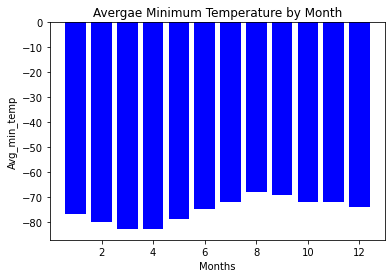

In [14]:
# Plot avg_min_temp
plt.bar(month_temp_df['mon_num'],month_temp_df['avg_min'], color='blue')

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Avg_min_temp")

# Create title 
plt.title('Avergae Minimum Temperature by Month')

In [15]:
# The coldest month

max_avg_temp = month_temp_df['avg_min'].max()
max_temp = month_temp_df.loc[month_temp_df['avg_min'] ==max_avg_temp]

max_temp

,mon_num,avg_min
7,8,-68


Which months has the lowest and highest atmospheric pressure on Mars? 

In [16]:
month_df = mars_df.groupby('month')
pressure_df = month_df.mean().loc[:,['pressure']]

pressure_df

/var/folders/0c/6w7_j4_n18j22s3htyjx82y00000gn/T/ipykernel_66195/1260564526.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pressure_df = month_df.mean().loc[:,['pressure']]


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [17]:
# lowest atmospheric pressure

min_pressure = pressure_df['pressure'].min()
min_month_pressure=pressure_df.loc[pressure_df['pressure']==min_pressure]
min_month_pressure

,pressure
month,
6,745.054422


In [18]:
# highest atmospheric pressure
max_pressure= pressure_df['pressure'].max()
max_month_pressure=pressure_df.loc[pressure_df['pressure']==max_pressure]
max_month_pressure

,pressure
month,
9,913.30597


Text(0.5, 1.0, 'Avergae Pressure by Month')

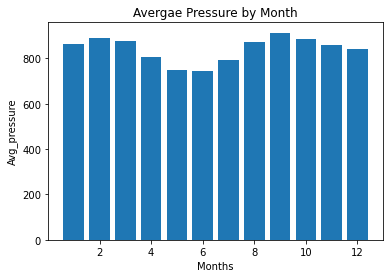

In [19]:
# Plot avg_pressure
x=range(1,13)
plt.bar(x, pressure_df['pressure'])

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Avg_pressure")

# Create title 
plt.title('Avergae Pressure by Month')


About how many terrestrial (Earth) days exist in a Martian year?

In [21]:
import datetime as dt
from datetime import timedelta
from datetime import datetime

ini_long = mars_df['ls'].loc[0]
fin_long=mars_df.loc[mars_df['ls']==ini_long]

a = fin_long['terrestrial_date'].loc[0]
date_after_one_martial_year = fin_long['terrestrial_date'].iloc[1]
martial_year_length = date_after_one_martial_year-a

print (martial_year_length)

686 days 00:00:00


Text(0.5, 1.0, 'Daily minimum temperature')

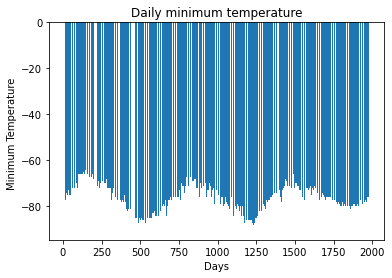

In [22]:

# Ploting the minimum temperature vs Martian Days 
plt.bar(mars_df['sol'],mars_df['min_temp'])

# Create labels for the x and y axes.
plt.xlabel("Days")
plt.ylabel("Minimum Temperature ")

# Create title 
plt.title('Daily minimum temperature')


Export to a CSVfile.

In [23]:
mars_df.to_csv('mars_part_2.csv',index=False)